In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [2]:
with zipfile.ZipFile('/content/drive/MyDrive/doencascardiacas.zip') as texto:
  print(*texto.namelist())

heart.csv


In [3]:
with zipfile.ZipFile('/content/drive/MyDrive/doencascardiacas.zip') as primeiro:
  with primeiro.open('heart.csv') as segundo:
    train = pd.read_csv(segundo)

In [4]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
train.rename(columns={
    "age": 'Idade',
    "sex": "Sexo",
    "cp": "Tipo de Dor",
    "trestbps": "Pressão Repouso",
    "chol": "Colesterol Sérico",
    "fbs": "Açucar no Sangue",	
    "restecg": "Eletrôcardiograma",	
    "thalach": "Frequência Card. Máx",	
    "exang":	"Dor no Peito Induzida", 
    "oldpeak":	"ST",
    "slope":	"Inclinação do ST",
    "ca": "Vasos principais",
    "thal":	"Estágio da Doença",
    "target": "Doente"
}, inplace = True)

In [9]:
train.head()

,Idade,Sexo,Tipo de Dor,Pressão Repouso,Colesterol Sérico,Açucar no Sangue,Eletrôcardiograma,Frequência Card. Máx,Dor no Peito Induzida,ST,Inclinação do ST,Vasos principais,Estágio da Doença,Doente
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
train.duplicated().sum()

723

In [12]:
hd = train.drop_duplicates()
hd

,Idade,Sexo,Tipo de Dor,Pressão Repouso,Colesterol Sérico,Açucar no Sangue,Eletrôcardiograma,Frequência Card. Máx,Dor no Peito Induzida,ST,Inclinação do ST,Vasos principais,Estágio da Doença,Doente
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [16]:
hd.describe()

,Idade,Sexo,Tipo de Dor,Pressão Repouso,Colesterol Sérico,Açucar no Sangue,Eletrôcardiograma,Frequência Card. Máx,Dor no Peito Induzida,ST,Inclinação do ST,Vasos principais,Estágio da Doença,Doente
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
hd.corr()

,Idade,Sexo,Tipo de Dor,Pressão Repouso,Colesterol Sérico,Açucar no Sangue,Eletrôcardiograma,Frequência Card. Máx,Dor no Peito Induzida,ST,Inclinação do ST,Vasos principais,Estágio da Doença,Doente
Idade,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
Sexo,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
Tipo de Dor,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
Pressão Repouso,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
Colesterol Sérico,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
Açucar no Sangue,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
Eletrôcardiograma,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
Frequência Card. Máx,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
Dor no Peito Induzida,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
ST,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


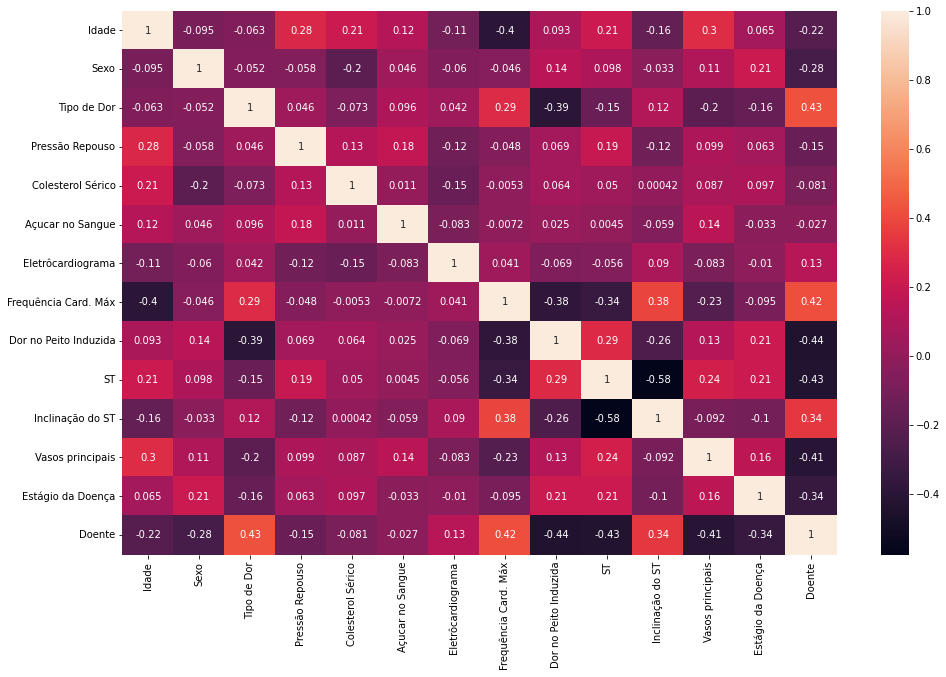

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(hd.corr(), annot = True)

In [23]:
for c in hd.columns:
  print(f'{c}: {hd[c].nunique()}')

Idade: 41
Sexo: 2
Tipo de Dor: 4
Pressão Repouso: 49
Colesterol Sérico: 152
Açucar no Sangue: 2
Eletrôcardiograma: 3
Frequência Card. Máx: 91
Dor no Peito Induzida: 2
ST: 40
Inclinação do ST: 3
Vasos principais: 5
Estágio da Doença: 4
Doente: 2


In [24]:
categoricas = ["Sexo", "Tipo de Dor", "Açucar no Sangue", "Eletrôcardiograma", "Dor no Peito Induzida", "Inclinação do ST", "Vasos principais", "Estágio da Doença"]
numericas = ["Idade", "Pressão Repouso", "Colesterol Sérico", "Frequência Card. Máx", "ST"]

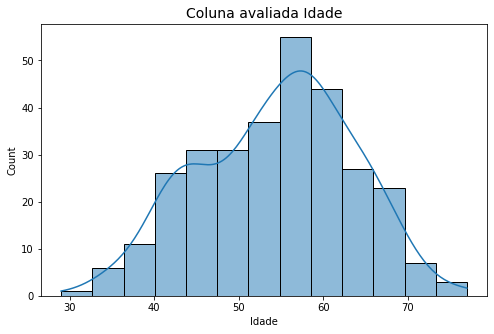

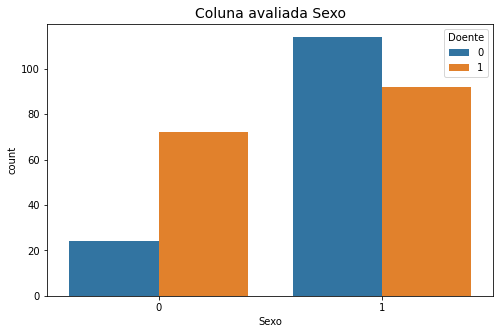

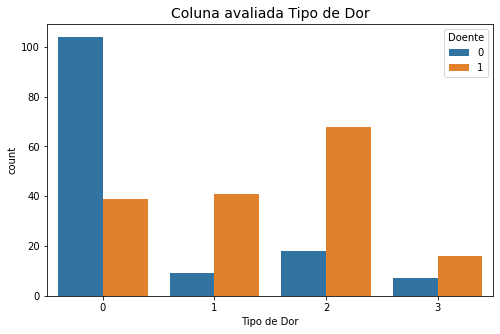

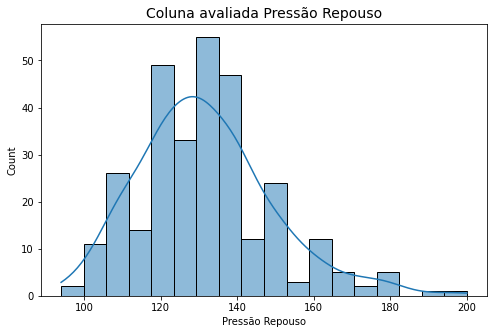

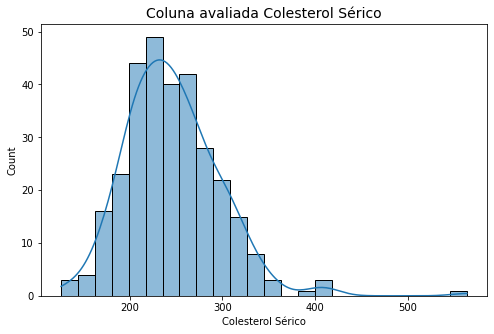

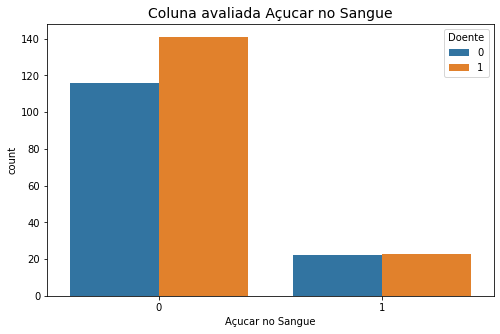

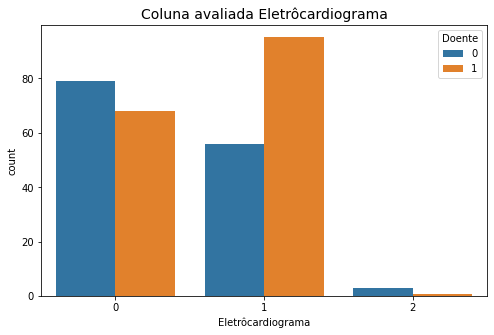

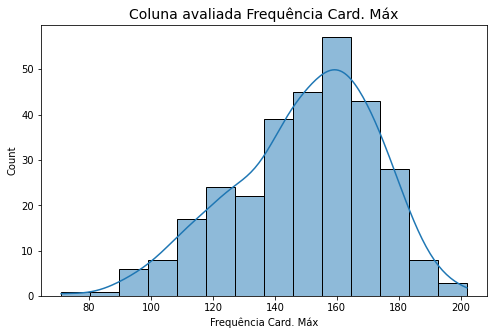

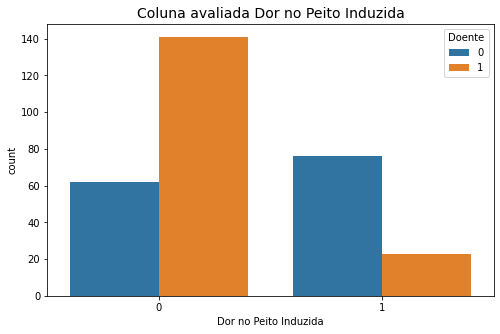

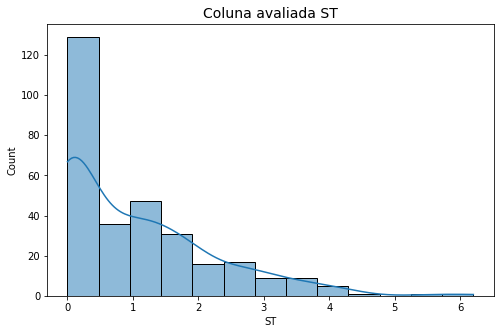

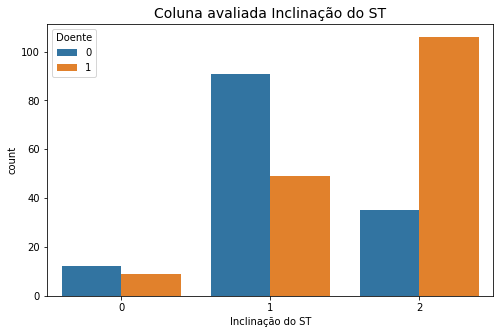

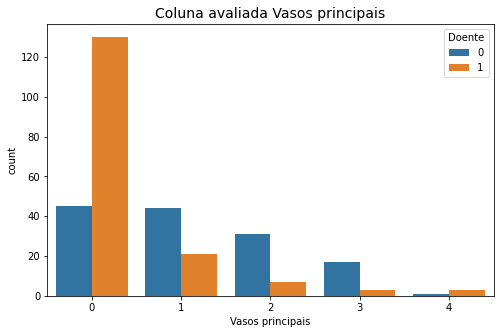

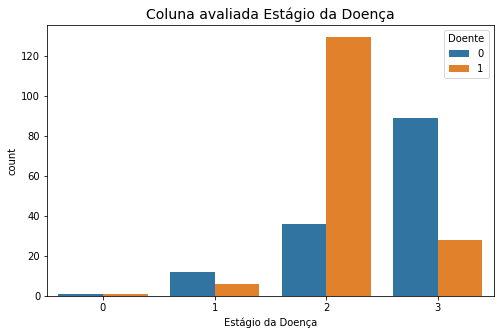

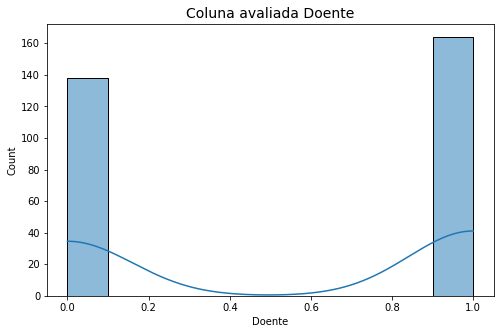

In [26]:
for c in hd.columns:
  plt.figure(figsize=(8,5))
  plt.title(f'Coluna avaliada {c}', fontsize=14)
  if c in categoricas:
    sns.countplot(x = hd[c], hue = hd['Doente'])
  else:
    sns.histplot(hd[c], kde = True)


# Removendo Outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

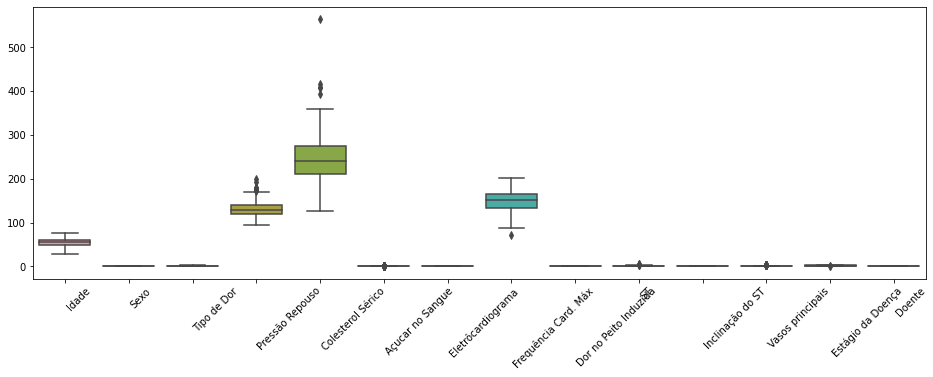

In [30]:
plt.figure(figsize=(16,5))
sns.boxplot(data = hd)
plt.xticks(rotation = 45, ha="left")

In [31]:
hd.describe()

,Idade,Sexo,Tipo de Dor,Pressão Repouso,Colesterol Sérico,Açucar no Sangue,Eletrôcardiograma,Frequência Card. Máx,Dor no Peito Induzida,ST,Inclinação do ST,Vasos principais,Estágio da Doença,Doente
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [32]:
hd['Pressão Repouso'].quantile(0.99)

180.0

In [33]:
hd1 = hd[hd['Pressão Repouso'] < hd['Pressão Repouso'].quantile(0.99)]

In [34]:
hd1

,Idade,Sexo,Tipo de Dor,Pressão Repouso,Colesterol Sérico,Açucar no Sangue,Eletrôcardiograma,Frequência Card. Máx,Dor no Peito Induzida,ST,Inclinação do ST,Vasos principais,Estágio da Doença,Doente
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

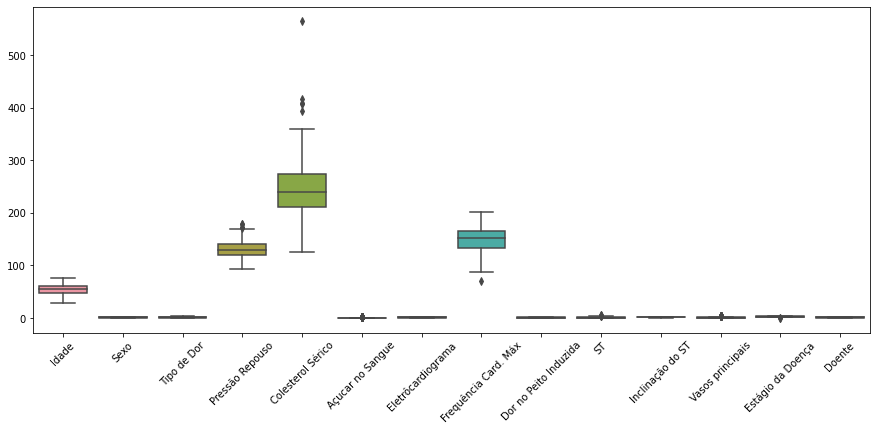

In [36]:
plt.figure(figsize=(15,6))
sns.boxplot(data = hd1)
plt.xticks(rotation=45)

In [41]:
hd1['Colesterol Sérico'].quantile(0.98)

354.4799999999999

In [42]:
hd2 = hd1[hd1['Colesterol Sérico'] < hd1['Colesterol Sérico'].quantile(0.98)]

In [43]:
hd2

,Idade,Sexo,Tipo de Dor,Pressão Repouso,Colesterol Sérico,Açucar no Sangue,Eletrôcardiograma,Frequência Card. Máx,Dor no Peito Induzida,ST,Inclinação do ST,Vasos principais,Estágio da Doença,Doente
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

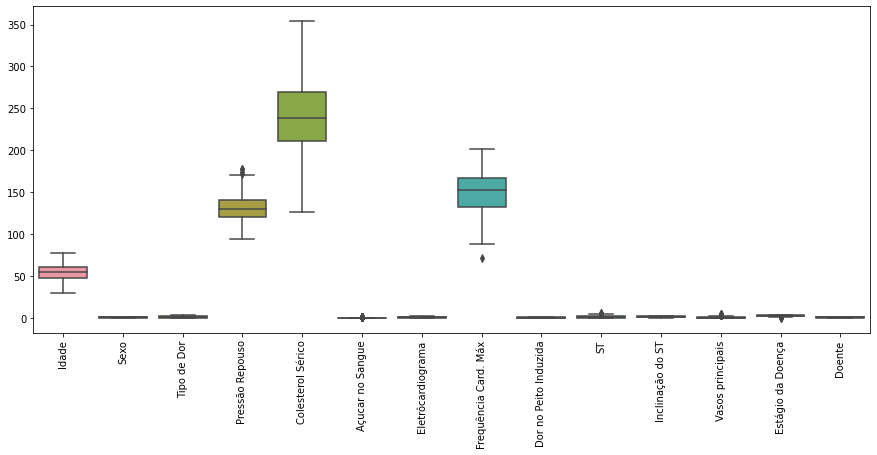

In [45]:
plt.figure(figsize=(15,6))
sns.boxplot(data = hd2)
plt.xticks(rotation=90)

In [47]:
hd2.describe()

,Idade,Sexo,Tipo de Dor,Pressão Repouso,Colesterol Sérico,Açucar no Sangue,Eletrôcardiograma,Frequência Card. Máx,Dor no Peito Induzida,ST,Inclinação do ST,Vasos principais,Estágio da Doença,Doente
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,54.158076,0.701031,0.969072,130.491409,241.907216,0.144330,0.536082,149.457045,0.323024,1.016151,1.402062,0.714777,2.305842,0.546392
std,9.064278,0.458595,1.035111,16.142761,44.214699,0.352029,0.519851,23.061553,0.468437,1.143368,0.615766,1.005719,0.615266,0.498701
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [48]:
hd2['Frequência Card. Máx'].quantile(0.005)

88.9

In [49]:
hd3 = hd2[hd2['Frequência Card. Máx'] > hd2['Frequência Card. Máx'].quantile(0.005)]
hd3

,Idade,Sexo,Tipo de Dor,Pressão Repouso,Colesterol Sérico,Açucar no Sangue,Eletrôcardiograma,Frequência Card. Máx,Dor no Peito Induzida,ST,Inclinação do ST,Vasos principais,Estágio da Doença,Doente
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

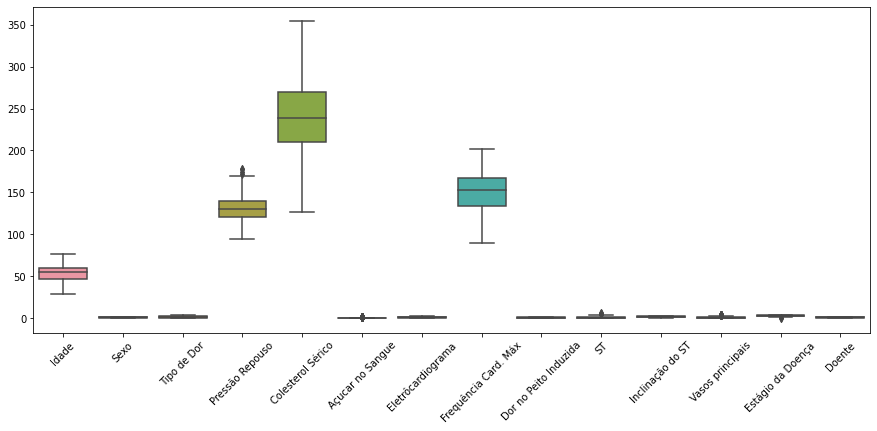

In [50]:
plt.figure(figsize=(15,6))
sns.boxplot(data = hd3)
plt.xticks(rotation=45)

In [51]:
hd3.describe()

,Idade,Sexo,Tipo de Dor,Pressão Repouso,Colesterol Sérico,Açucar no Sangue,Eletrôcardiograma,Frequência Card. Máx,Dor no Peito Induzida,ST,Inclinação do ST,Vasos principais,Estágio da Doença,Doente
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.103806,0.698962,0.975779,130.453287,241.813149,0.145329,0.532872,149.941176,0.321799,1.015571,1.404844,0.716263,2.304498,0.550173
std,9.062454,0.459505,1.035533,16.137174,44.326594,0.353043,0.520209,22.378685,0.467977,1.147279,0.616985,1.008185,0.615777,0.498339
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [52]:
categoricas

['Sexo',
 'Tipo de Dor',
 'Açucar no Sangue',
 'Eletrôcardiograma',
 'Dor no Peito Induzida',
 'Inclinação do ST',
 'Vasos principais',
 'Estágio da Doença']

In [53]:
numericas

['Idade', 'Pressão Repouso', 'Colesterol Sérico', 'Frequência Card. Máx', 'ST']

In [54]:
hd4 = pd.get_dummies(hd3, columns = categoricas)
hd4

,Idade,Pressão Repouso,Colesterol Sérico,Frequência Card. Máx,ST,Doente,Sexo_0,Sexo_1,Tipo de Dor_0,Tipo de Dor_1,...,Inclinação do ST_2,Vasos principais_0,Vasos principais_1,Vasos principais_2,Vasos principais_3,Vasos principais_4,Estágio da Doença_0,Estágio da Doença_1,Estágio da Doença_2,Estágio da Doença_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
733,44,108,141,175,0.6,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
739,52,128,255,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
843,59,160,273,125,0.0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [55]:
hd4.columns

Index(['Idade', 'Pressão Repouso', 'Colesterol Sérico', 'Frequência Card. Máx',
       'ST', 'Doente', 'Sexo_0', 'Sexo_1', 'Tipo de Dor_0', 'Tipo de Dor_1',
       'Tipo de Dor_2', 'Tipo de Dor_3', 'Açucar no Sangue_0',
       'Açucar no Sangue_1', 'Eletrôcardiograma_0', 'Eletrôcardiograma_1',
       'Eletrôcardiograma_2', 'Dor no Peito Induzida_0',
       'Dor no Peito Induzida_1', 'Inclinação do ST_0', 'Inclinação do ST_1',
       'Inclinação do ST_2', 'Vasos principais_0', 'Vasos principais_1',
       'Vasos principais_2', 'Vasos principais_3', 'Vasos principais_4',
       'Estágio da Doença_0', 'Estágio da Doença_1', 'Estágio da Doença_2',
       'Estágio da Doença_3'],
      dtype='object')

In [56]:
X = hd4.drop('Doente', axis = 1)
y = hd4['Doente']

In [57]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, metrics, preprocessing, linear_model
from sklearn.svm import  LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
!pip install catboost
import catboost
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [61]:
modelo = LogisticRegression(max_iter=1000)

In [62]:
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [63]:
modelo.score(X_train, y_train)

0.8744588744588745

In [64]:
modelo.score(X_valid, y_valid)

0.8448275862068966

In [65]:
predicao = modelo.predict(X_valid)

In [66]:
predicao

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [68]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(y_valid, predicao)

0.8448275862068966

In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_valid, predicao))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58



In [73]:
confusion_matrix(y_valid, predicao)

array([[18,  6],
       [ 3, 31]])

# Função para automatizar

In [75]:
def relatorio_ml(df, machine, opt = 2):
  X = df.drop('Doente', axis = 1)
  y = df['Doente']

  X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

  if opt == 0:
    ml = machine(max_iter = 1000)
  elif opt == 1:
    ml = machine(n_estimators = 1000)
  elif opt == 2:
    ml = machine()

  ml.fit(X_train, y_train)
  score_train = ml.score(X_train, y_train)
  print(f'Acurácia treino: {score_train * 100:.2f}%')
  score_valid = ml.score(X_valid, y_valid)
  print(f'Acurácia validação: {score_valid * 100:.2f}%')

  predicao = ml.predict(X_valid)
  print('====Classification Report =======')
  print(classification_report(y_valid, predicao))
  print('====Confusion Matrix =====')
  confusao = confusion_matrix(y_valid, predicao)

  sns.heatmap(confusao, annot = True, cmap = 'Blues')

  return score_train, score_valid

Acurácia treino: 87.45%
Acurácia validação: 84.48%
====Classification Report =======
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

====Confusion Matrix =====


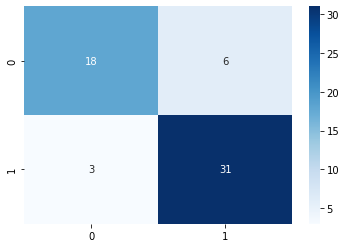

In [78]:
modelo_train, modelo_valid = relatorio_ml(hd4, LogisticRegression, opt = 0)

Acurácia treino: 100.00%
Acurácia validação: 68.97%
====Classification Report =======
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        24
           1       0.72      0.76      0.74        34

    accuracy                           0.69        58
   macro avg       0.68      0.67      0.68        58
weighted avg       0.69      0.69      0.69        58

====Confusion Matrix =====


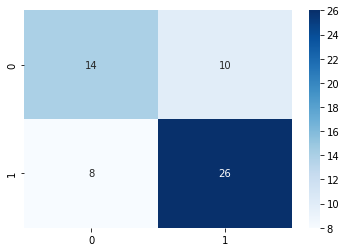

In [79]:
tree_train, tree_valid = relatorio_ml(hd4, DecisionTreeClassifier)

In [80]:
from sklearn.ensemble import AdaBoostClassifier

Acurácia treino: 93.51%
Acurácia validação: 82.76%
====Classification Report =======
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.82      0.91      0.86        34

    accuracy                           0.83        58
   macro avg       0.83      0.81      0.82        58
weighted avg       0.83      0.83      0.82        58

====Confusion Matrix =====


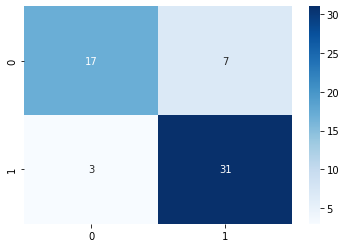

In [81]:
ada_train, ada_valid = relatorio_ml(hd4, AdaBoostClassifier)

Acurácia treino: 77.06%
Acurácia validação: 60.34%
====Classification Report =======
              precision    recall  f1-score   support

           0       0.52      0.54      0.53        24
           1       0.67      0.65      0.66        34

    accuracy                           0.60        58
   macro avg       0.59      0.59      0.59        58
weighted avg       0.61      0.60      0.60        58

====Confusion Matrix =====


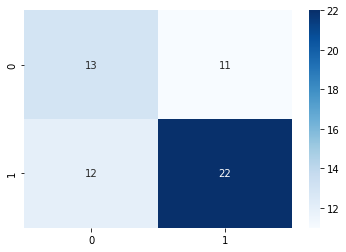

In [82]:
kn_train, kn_valid = relatorio_ml(hd4, KNeighborsClassifier)

In [83]:
#o standar scaler melhora a performance de kneighbors classifier

Acurácia treino: 100.00%
Acurácia validação: 79.31%
====Classification Report =======
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.81      0.85      0.83        34

    accuracy                           0.79        58
   macro avg       0.79      0.78      0.78        58
weighted avg       0.79      0.79      0.79        58

====Confusion Matrix =====


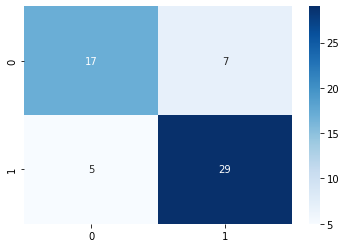

In [84]:
rf_train, rf_valid = relatorio_ml(hd4, RandomForestClassifier)

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
def algoritmo_ml(df, machine, opt = 2):
  X = df.drop('Doente', axis = 1)
  y = df['Doente']

  X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)
  #usar o standar scaler
  #usa-se o X_train
  scaler = StandardScaler()
  cols_scaler = numericas
  X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])
  X_valid[cols_scaler] = scaler.transform(X_valid[cols_scaler])


  if opt == 0:
    ml = machine(max_iter = 1000)
  elif opt == 1:
    ml = machine(n_estimators = 1000)
  elif opt == 2:
    ml = machine()

  ml.fit(X_train, y_train)
  score_train = ml.score(X_train, y_train)
  print(f'Acurácia treino: {score_train * 100:.2f}%')
  score_valid = ml.score(X_valid, y_valid)
  print(f'Acurácia validação: {score_valid * 100:.2f}%')

  predicao = ml.predict(X_valid)
  print('====Classification Report =======')
  print(classification_report(y_valid, predicao))
  print('====Confusion Matrix =====')
  confusao = confusion_matrix(y_valid, predicao)

  sns.heatmap(confusao, annot = True, cmap = 'Blues')

  return score_train, score_valid

Acurácia treino: 87.45%
Acurácia validação: 84.48%
====Classification Report =======
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

====Confusion Matrix =====


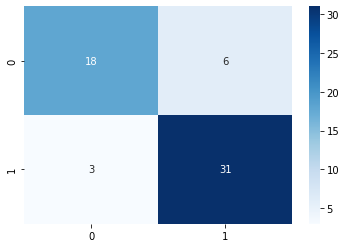

In [88]:
modelo_train, modelo_valid = algoritmo_ml(hd4, LogisticRegression, opt = 0)

Acurácia treino: 100.00%
Acurácia validação: 70.69%
====Classification Report =======
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        24
           1       0.77      0.71      0.74        34

    accuracy                           0.71        58
   macro avg       0.70      0.71      0.70        58
weighted avg       0.71      0.71      0.71        58

====Confusion Matrix =====


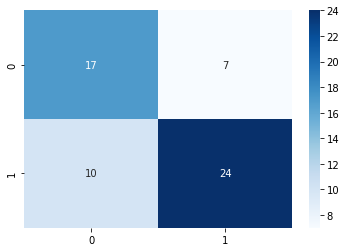

In [89]:
tree_train, tree_valid = algoritmo_ml(hd4, DecisionTreeClassifier)

Acurácia treino: 93.51%
Acurácia validação: 82.76%
====Classification Report =======
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.82      0.91      0.86        34

    accuracy                           0.83        58
   macro avg       0.83      0.81      0.82        58
weighted avg       0.83      0.83      0.82        58

====Confusion Matrix =====


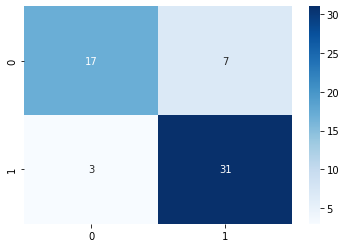

In [90]:
ada_train, ada_valid = algoritmo_ml(hd4, AdaBoostClassifier)

Acurácia treino: 87.45%
Acurácia validação: 79.31%
====Classification Report =======
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.81      0.85      0.83        34

    accuracy                           0.79        58
   macro avg       0.79      0.78      0.78        58
weighted avg       0.79      0.79      0.79        58

====Confusion Matrix =====


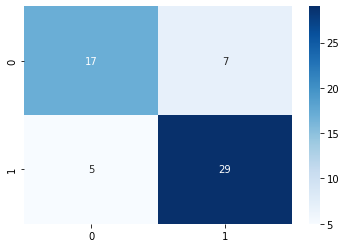

In [91]:
kn_train, kn_valid = algoritmo_ml(hd4, KNeighborsClassifier)

Acurácia treino: 100.00%
Acurácia validação: 79.31%
====Classification Report =======
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        24
           1       0.79      0.88      0.83        34

    accuracy                           0.79        58
   macro avg       0.79      0.77      0.78        58
weighted avg       0.79      0.79      0.79        58

====Confusion Matrix =====


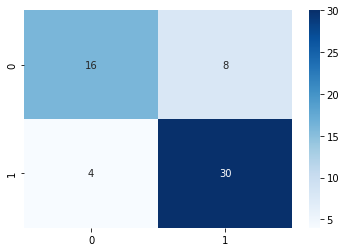

In [92]:
rf_train, rf_valid = algoritmo_ml(hd4, RandomForestClassifier)

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, metrics, preprocessing, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
!pip install catboost
import catboost
from catboost import CatBoostClassifier, Pool, cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix